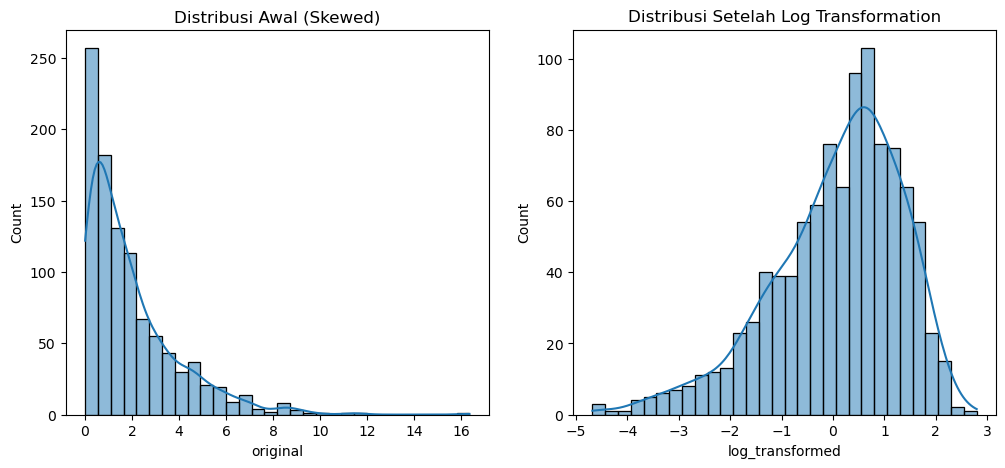

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh data skewed
np.random.seed(42)
data = np.random.exponential(scale=2, size=1000)  # Data eksponensial (skewed)
df = pd.DataFrame({'original': data})

# Log transformation (pakai natural log)
df['log_transformed'] = np.log(df['original'])

# Plot sebelum dan sesudah transformasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['original'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribusi Awal (Skewed)")

sns.histplot(df['log_transformed'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribusi Setelah Log Transformation")

plt.show()

## kita coba di California Housing Dataset!
#### Ini dataset yang cocok buat regresi karena berisi data harga rumah di California berdasarkan beberapa fitur seperti luas tanah, jumlah kamar, dll.
#### 🔹 Langkah-langkah yang Akan Kita Lakukan:
#### Load dataset California Housing dari sklearn.datasets.
#### Lihat distribusi fitur yang mungkin butuh log transformation.
#### Terapkan log transformation pada fitur yang skewed.
#### Bandingkan distribusi sebelum dan sesudah transformasi pakai visualisasi.

Skewness sebelum transformasi:
MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
dtype: float64

Fitur yang akan ditransformasi: ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


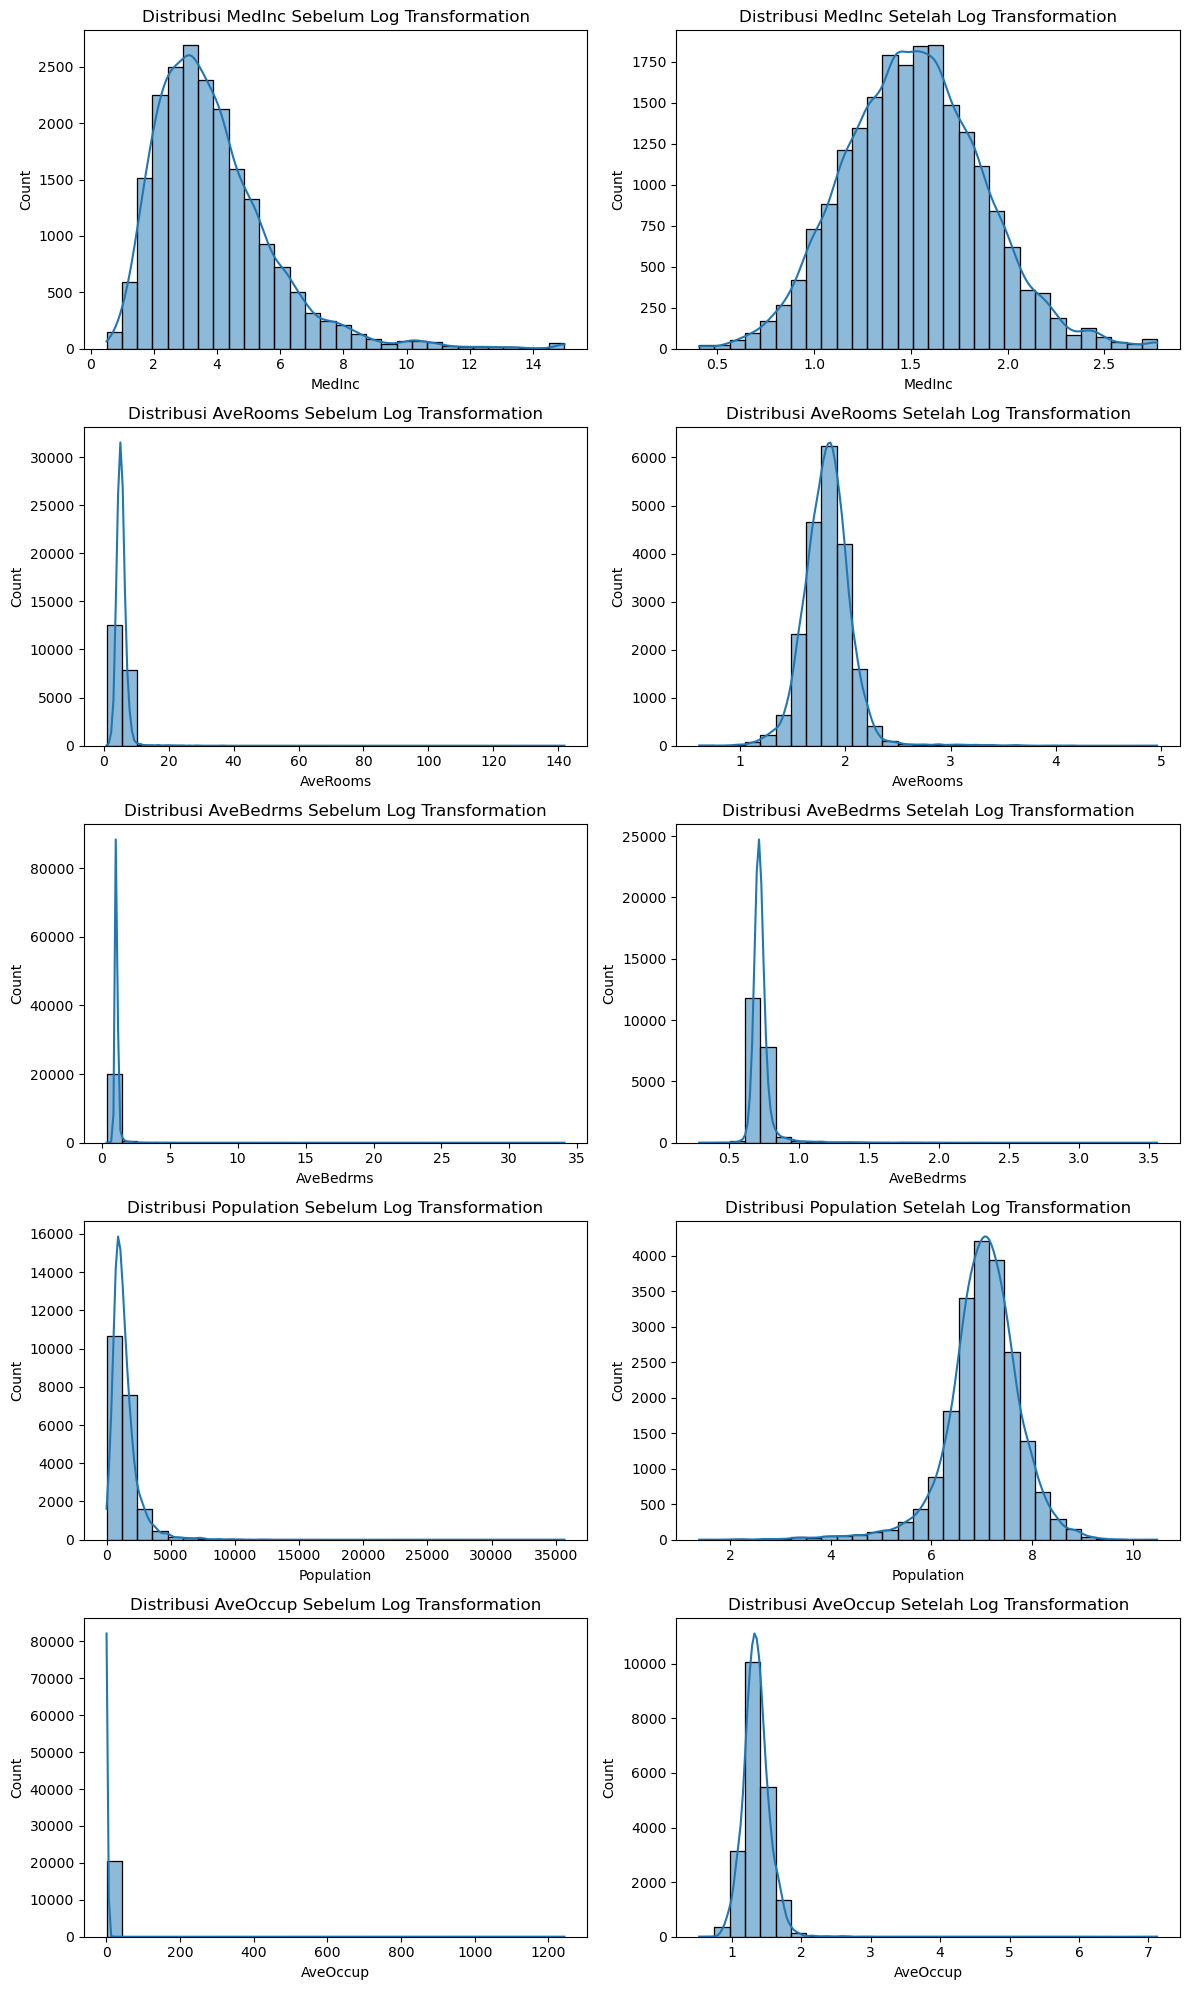


Skewness setelah transformasi:
MedInc        0.226083
HouseAge      0.060331
AveRooms      1.390761
AveBedrms     8.988786
Population   -1.044087
AveOccup      3.879679
Latitude      0.465953
Longitude    -0.297801
dtype: float64


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Cek skewness sebelum transformasi
print("Skewness sebelum transformasi:")
print(df.skew())

# Pilih fitur yang sangat skewed (threshold: >1 atau <-1)
skewed_features = df.skew()[df.skew().abs() > 1].index
print("\nFitur yang akan ditransformasi:", list(skewed_features))

# Terapkan log transformation (pakai log1p untuk menghindari log(0))
df_log_transformed = df.copy()
df_log_transformed[skewed_features] = np.log1p(df_log_transformed[skewed_features])

# Visualisasi distribusi sebelum & sesudah transformasi
fig, axes = plt.subplots(len(skewed_features), 2, figsize=(12, len(skewed_features) * 4))

for i, feature in enumerate(skewed_features):
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribusi {feature} Sebelum Log Transformation")

    sns.histplot(df_log_transformed[feature], bins=30, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Distribusi {feature} Setelah Log Transformation")

plt.tight_layout()
plt.show()

# Cek skewness setelah transformasi
print("\nSkewness setelah transformasi:")
print(df_log_transformed.skew())


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target  # Tambahkan target (harga rumah)

# Pilih fitur yang sangat skewed (|skewness| > 1)
skewed_features = df.drop(columns=['Target']).skew().abs()
skewed_features = skewed_features[skewed_features > 1].index

# Copy dataset dan lakukan log transformation hanya untuk fitur skewed
df_log = df.copy()
df_log[skewed_features] = np.log1p(df_log[skewed_features])

# Pisahkan fitur & target
X, y = df.drop(columns=['Target']), df['Target']
X_log, y_log = df_log.drop(columns=['Target']), df_log['Target']  # Target tetap, tidak di-log

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

# Model Linear Regression sebelum transformasi
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Model Linear Regression setelah log transformation
model2 = LinearRegression()
model2.fit(X_train_log, y_train_log)
y_pred2 = model2.predict(X_test_log)

# Evaluasi performa
mae_before = mean_absolute_error(y_test, y_pred1)
r2_before = r2_score(y_test, y_pred1)

mae_after = mean_absolute_error(y_test_log, y_pred2)
r2_after = r2_score(y_test_log, y_pred2)

# Cetak hasil
print(f"📊 MAE Sebelum Log Transformation: {mae_before:.4f}")
print(f"📈 R² Score Sebelum Log Transformation: {r2_before:.4f}")

print(f"\n📊 MAE Setelah Log Transformation: {mae_after:.4f}")
print(f"📈 R² Score Setelah Log Transformation: {r2_after:.4f}")

📊 MAE Sebelum Log Transformation: 0.5332
📈 R² Score Sebelum Log Transformation: 0.5758

📊 MAE Setelah Log Transformation: 0.5315
📈 R² Score Setelah Log Transformation: 0.6114
